# Graphical Models

###### COMP4670/8600 - Introduction to Statistical Machine Learning - Tutorial 6

Setting up the environment

In [1]:
import numpy as np

%install_ext https://sml.forge.nicta.com.au/isml16/tutorial/tikzmagic.py
#%install_ext https://raw.githubusercontent.com/mkrphys/ipython-tikzmagic/master/tikzmagic.py

Installed tikzmagic.py. To use it, type:
  %load_ext tikzmagic


/usr/local/lib/python3.4/dist-packages/IPython/core/magics/extension.py:47: UserWarning: %install_ext` is deprecated, please distribute your extension as a python package.
  "as a python package.", UserWarning)


In [2]:
%load_ext tikzmagic

## Reviewing discrete probability

Recall the meaning of the following terms:
* Joint probability distribution
* Marginal distribution
* Conditional distribution

Consider the following table defining the joint probability distribution of two variables $A$ and $B$.

|  | A=$\square$ | A=$\bigcirc$ | A = $\clubsuit$ | A = $\heartsuit$ | A = $\triangle$ |
|--|:--:|:--:|:--:|:--:|:--:|
|**B**=$p$|0.01|0.01|0.12|0.01|0.14|
|**B**=$q$|0.03|0.15|0.01|0.01|0.01|
|**B**=$r$|0.13|0.11|0.07|0.18|0.01|

Compute the following distributions:
* $p(B=p | A = \bigcirc)$ - single value
* $p(B | A = \bigcirc)$ - A distribution
* $p(B)$ - a distribution

You may do this calculation by hand or using python.


### Solution description

* $p(B=p|A=\bigcirc) = \frac{p(B=p,\,A=\bigcirc)}{p(A=\bigcirc)} = \frac{p(B=p,\,A=\bigcirc)}{\sum_{B}p(B,\,A=\bigcirc)}$ 
* $p(B|A = \bigcirc) = [p(B=p|A = \bigcirc), p(B=q|A = \bigcirc), p(B=r|A = \bigcirc)]$
* $p(B) = \sum_{A}p(B,\,A) = [p(B,\,A=\square), p(B,\,A=\bigcirc), p(B,\,A=\clubsuit), p(B,\,A=\heartsuit), p(B,\,A=\triangle)]$

## Bayes Rule

Recall that there are only two rules of probability, the sum rule and the product rule. Using these two rules, prove Bayes rule.
$$p(Y|X) = \frac{p(X|Y)p(Y)}{\sum_Y p(X,Y)}$$
Observe that the left hand side is a function of $Y$ and the right hand side is a function of $X$ and $p(Y)$ only.

### Solution description

$$p(Y|X) = \frac{p(X|Y)p(Y)}{\sum_Y p(X,Y)}$$

$$
\begin{align}
p(X,Y) &= p(X|Y)p(Y) = p(Y|X)p(X)\\
\Rightarrow p(Y|X) &= \frac{p(X|Y)p(Y)}{p(X)}\\
&= \frac{p(X|Y)p(Y)}{\sum_{Y}p(X,Y)}
\end{align}
$$

## Empirical verification of Bayes rule

Using the distribution $p(A,B)$ above, compute the all terms in Bayes rule, and verify your theorem.

## Dependent random variables

Consider the following problem with 5 random variables.
* **A**ches with states (False, True)
* **B**ronchitis with states (none, mild, severe)
* **C**ough with states (False, True)
* **D**isease with states (healthy, carrier, sick, recovering)
* **E**mergency with states (False, True)

How much memory is needed to store the joint probability distribution if:
* All variables were dependent?
* All variables were independent?

### Solution description

* $O(max\{\#options in node\}^{\{\# of nodes\}})$

Consider the following graphical model.

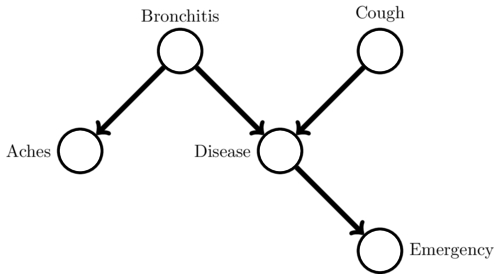

In [3]:
%%tikz --scale 2 --size 500,300 -f jpg
\tikzstyle{vertex}=[circle, draw=black, fill=white, line width=0.5mm, minimum size=25pt, inner sep=0pt]
\tikzstyle{edge} = [draw, line width=1mm, ->]

\node[vertex,label=left:{Aches}] (a) at (0,0) {};
\node[vertex,label=above:{Bronchitis}] (b) at (1,1) {};
\node[vertex,label=above:{Cough}] (c) at (3,1) {};
\node[vertex,label=left:{Disease}] (d) at (2,0) {};
\node[vertex,label=right:{Emergency}] (e) at (3,-1) {};

\foreach \source/ \dest in {b/a, b/d, c/d, d/e}
        \path[edge] (\source) -- (\dest);

How much memory is needed to store the joint probability distribution? Identify the conditional independences in the graph. Consider both cases: when variables are observed and when they are unobserved. 

*A random variable $X$ is independent of $Y$ given $Z$ (written $X\perp Y | Z$) if and only if
$$p(X|Y,Z) = p(X|Z).$$
Equivalently this can be seen as a generalisation of the factorisation property when you have independence,
\begin{align*}
    p(X,Y|Z) &  = p(X|Y,Z) p(Y|Z)\\
    &           = p(X|Z) p(Y|Z)
\end{align*}
The first equality above is just the product rule.*

By observing the structure of the graphical model and using the sum rule and product rule, prove the conditional independences that you have identified.

### Solution description

Consider the following tables.

|$p(B)$ | B=n | B=m | B=s |
|:-----:|:--:|:--:|:--:|
|marginal| 0.97 | 0.01 | 0.02 |

|$p(C)$ | C=False | C=True |
|:-----:|:--:|:--:|
|marginal| 0.7 | 0.3 |

| $p(A|B)$ | B=n | B=m | B=s |
|:-----:|:--:|:--:|:--:|
|**A**=False |0.9|0.8|0.3|
|**A**=True |0.1|0.2|0.7|

| $p(D|B,C)$ | B=n, C=F | B=m, C=F | B=s, C=F | B=n, C=T | B=m, C=T | B=s, C=T |
|:-----:|:--:|:--:|:--:|:--:|:--:|:--:|
|**D**=healthy   |0.9 |0.8 |0.1 |  0.3 |0.4 |0.01|
|**D**=carrier   |0.08|0.17|0.01|  0.05|0.05|0.01|
|**D**=sick      |0.01|0.01|0.87|  0.05|0.15|0.97|
|**D**=recovering|0.01|0.02|0.02|  0.6 |0.4 |0.01|

| $p(E|D)$ | D=h | D=c | D=s | D=r |
|:-----:|:--:|:--:|:--:|
|**E**=False |0.99|0.99|0.4|0.9|
|**E**=True |0.01|0.01|0.6|0.1|


Compute the following:
* p(A,B,C,D,E)
* p(E)
* p(E|B=s)
* p(E|B=s, C=T)

Note that there are two ways of arriving at the distributions:
1. By computing p(A,B,C,D,E) and marginalising and conditioning appropriately
2. By only computing the required distributions directly using the graphical model structure.
Check that both ways give the same answer.

In [ ]:
# Solution goes here

## Markov Random Field

Convert the Bayesian Network above to a Markov Random Field. Draw the resulting network in tikz.

In [ ]:
# Solution goes here

Identify the maximal cliques in the graph and write down the corresponding clique potentials. Compare the conditional independence statements of the MRF with the BN.

### Solution description